<a href="https://colab.research.google.com/github/monir383/oasis/blob/main/EDA_ON_RETAIL_SALES_DATA_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***step1: IMPORTING THE LIBRARIES***


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***STEP 2:LOAD THE DATASET***

In [ ]:
df = pd.read_csv("/content/customer_shopping_data.csv")

# ***STEP 3:INITIAL DATA INSPECTION***

In [ ]:
print("\n--- Head ---")
print(df.head())
print("\n--- Info ---")
df.info()
print("\n--- Describe ---")
print(df.describe())


--- Head ---
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id   

# ***STEP 4: DATA CLEANING***

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Convert date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Add Sales column
df['Sales'] = df['quantity'] * df['price']


# **STEP 5: DESCRIPTIVE STATISTICS**

In [ ]:
print("\n--- Median ---")
print(df.median(numeric_only=True))
print("\n--- Mode ---")
print(df.mode(numeric_only=True).iloc[0])


--- Median ---
age          43.00
quantity      3.00
price       203.30
Sales       600.17
dtype: float64

--- Mode ---
age           37.00
quantity       3.00
price        600.16
Sales       1200.32
Name: 0, dtype: float64


# ***STEP 6: TIME SERIES ANALYSIS***

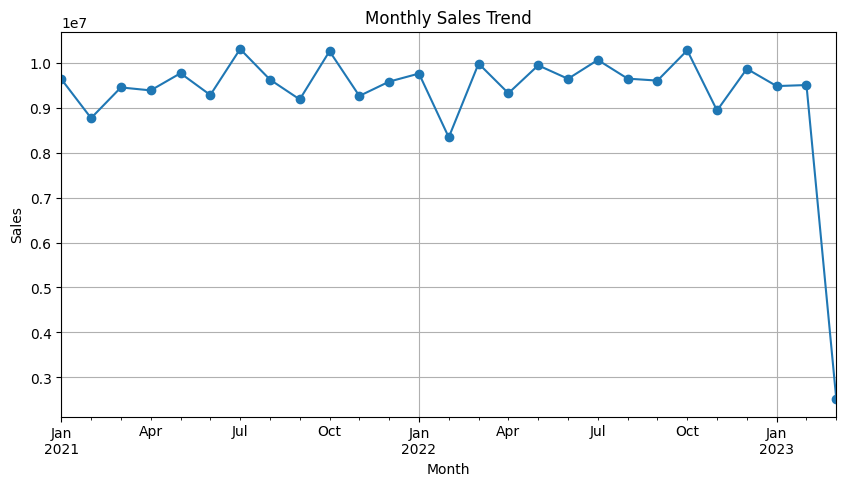

In [ ]:
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# *STEP 7: CUSTOMER AND PRODUCT ANALYSIS*


Unique Customers: 99457


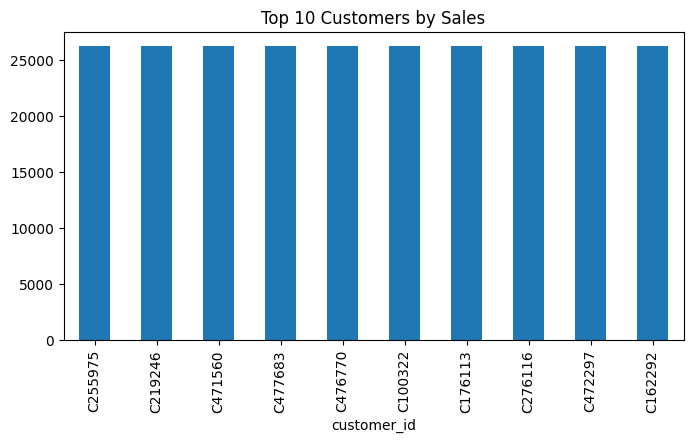

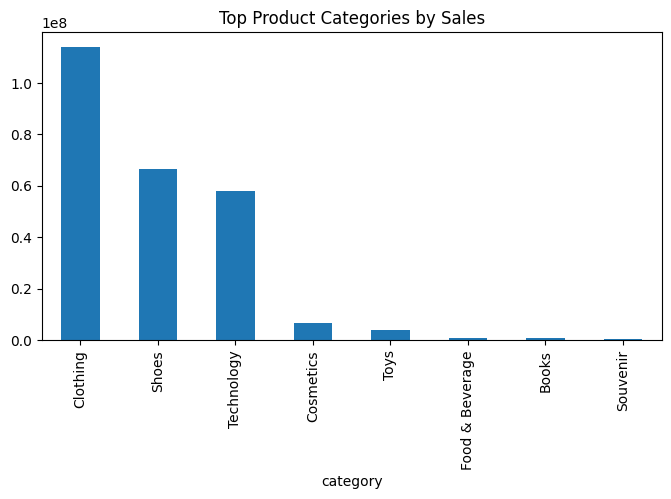

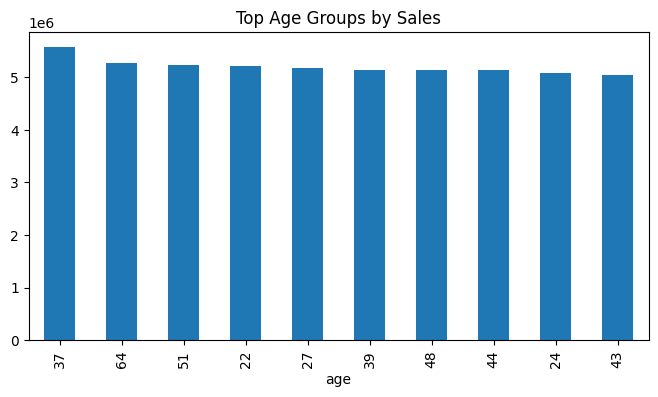

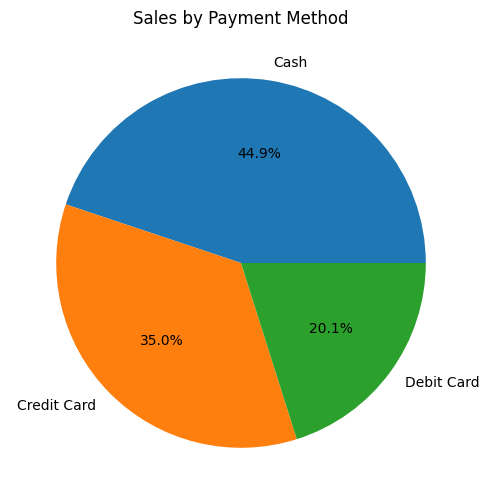

In [ ]:
print("\nUnique Customers:", df['customer_id'].nunique())
top_customers = df.groupby('customer_id')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales', figsize=(8,4))
plt.show()

top_categories = df.groupby('category')['Sales'].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', title='Top Product Categories by Sales', figsize=(8,4))
plt.show()

age_group_sales = df.groupby('age')['Sales'].sum().sort_values(ascending=False).head(10)
age_group_sales.plot(kind='bar', title='Top Age Groups by Sales', figsize=(8,4))
plt.show()

payment_sales = df.groupby('payment_method')['Sales'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Payment Method', figsize=(6,6))
plt.ylabel('')
plt.show()

# ***STEP 8 :VISUALIZATION***

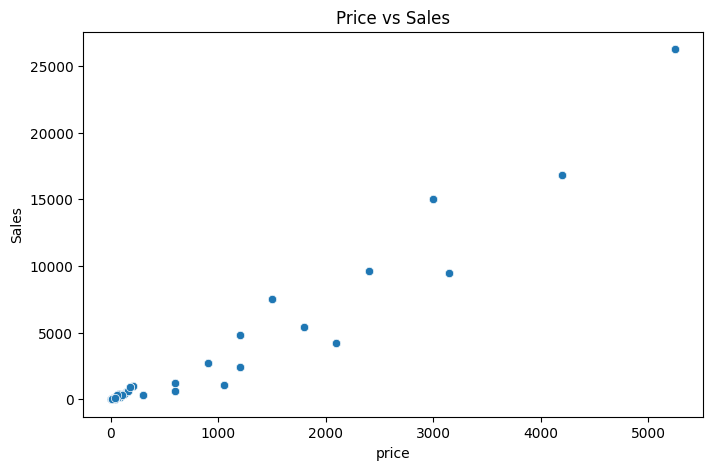

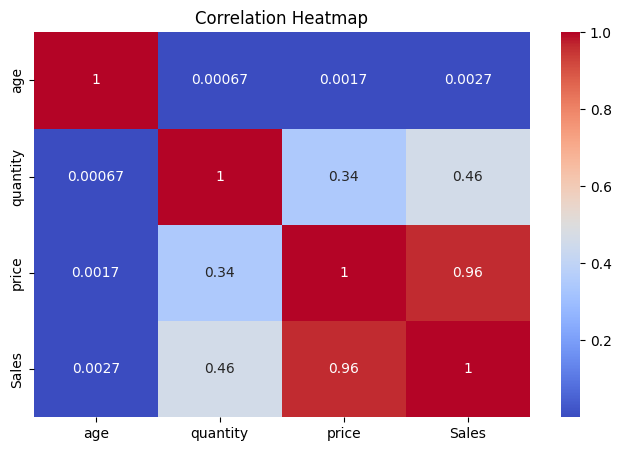

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price', y='Sales')
plt.title('Price vs Sales')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ***STEP 9: RECOMMENDATIONS***

In [ ]:
print("\n--- Recommendations ---")
print("1. Focus on high-value customer segments based on top customer IDs.")
print("2. Target marketing for age groups contributing highest sales.")
print("3. Invest in top-performing product categories such as Clothing or Shoes.")
print("4. Encourage payment methods with higher transaction value (e.g. Credit Card).")
print("5. Monitor sales trends to align promotions with peak shopping months.")



--- Recommendations ---
1. Focus on high-value customer segments based on top customer IDs.
2. Target marketing for age groups contributing highest sales.
3. Invest in top-performing product categories such as Clothing or Shoes.
4. Encourage payment methods with higher transaction value (e.g. Credit Card).
5. Monitor sales trends to align promotions with peak shopping months.
